In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from betavae import BVAE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [2]:
z_dim = 16
beta = 10

num_epochs = 50
batch_size = 64
gradient_accumulation_steps = 1
lr = 1e-3

updates_per_epoch = 1

In [3]:
rand_state = 420

torch.manual_seed(rand_state)
np.random.seed(rand_state)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
# shapes = pd.read_csv('shapes.csv')
# shapes.head()

In [6]:
resize = transforms.Resize(64)
shapes = resize(torch.load('shapes.pt').permute(0, 3, 1, 2) / 255)
del resize
shapes.shape

torch.Size([20000, 3, 64, 64])

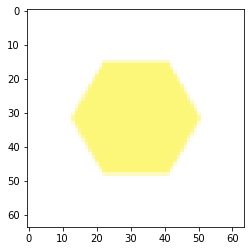

In [7]:
plt.imshow(shapes[0].permute(1, 2, 0).cpu())

In [8]:
train, valid = train_test_split(shapes, test_size=0.1, random_state=rand_state)
del shapes

In [9]:
bce_loss = nn.BCELoss(reduction='sum')
def vae_loss(x, mu, var, recon, beta):
    recon_loss = bce_loss(recon, x)
    kl = -torch.sum(1 + var - torch.pow(mu, 2) - torch.exp(var)) / 2
    return (recon_loss + beta * kl) / x.size(0)

Epoch 1:  97%|███████████████████████████████████████████████████████████████████▊  | 273/282 [00:05<00:00, 103.63it/s]

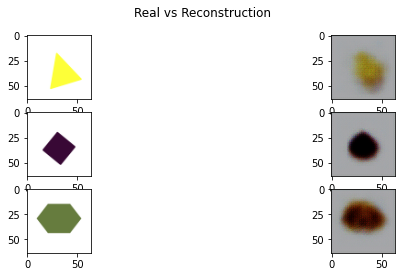

Epoch 1 | train loss 7115.94 | valid loss 6253.98: 100%|█████████████████████████████| 282/282 [00:05<00:00, 47.48it/s]
Epoch 2:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.54it/s]

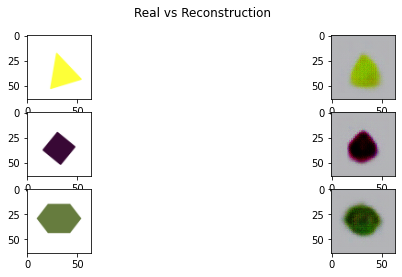

Epoch 2 | train loss 5706.76 | valid loss 5240.67: 100%|█████████████████████████████| 282/282 [00:03<00:00, 92.11it/s]
Epoch 3:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 104.02it/s]

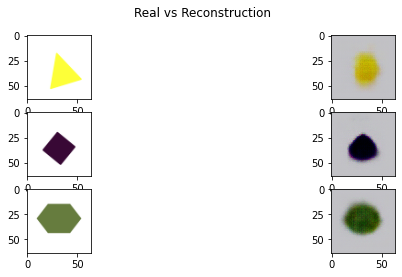

Epoch 3 | train loss 4736.77 | valid loss 4344.86: 100%|█████████████████████████████| 282/282 [00:03<00:00, 89.96it/s]
Epoch 4:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.04it/s]

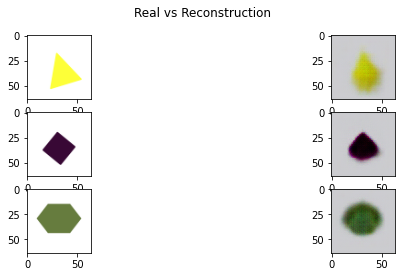

Epoch 4 | train loss 4037.75 | valid loss 3743.07: 100%|█████████████████████████████| 282/282 [00:03<00:00, 91.60it/s]
Epoch 5:  98%|████████████████████████████████████████████████████████████████████▎ | 275/282 [00:02<00:00, 102.97it/s]

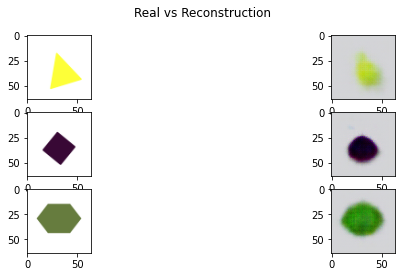

Epoch 5 | train loss 3517.49 | valid loss 3274.29: 100%|█████████████████████████████| 282/282 [00:03<00:00, 92.15it/s]
Epoch 6:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.76it/s]

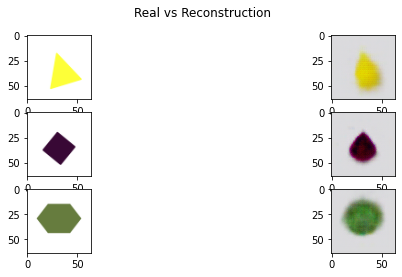

Epoch 6 | train loss 3113.07 | valid loss 2935.31: 100%|█████████████████████████████| 282/282 [00:03<00:00, 92.08it/s]
Epoch 7:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.24it/s]

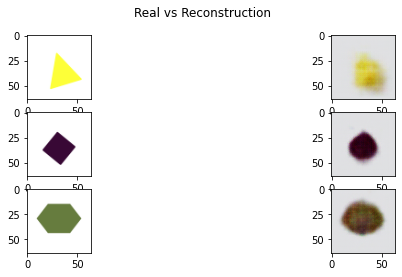

Epoch 7 | train loss 2800.80 | valid loss 2701.57: 100%|█████████████████████████████| 282/282 [00:03<00:00, 89.10it/s]
Epoch 8:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.18it/s]

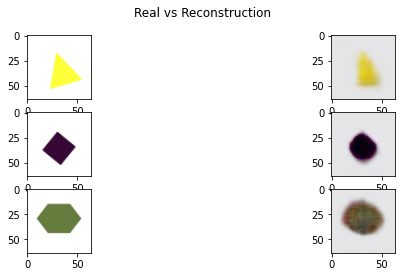

Epoch 8 | train loss 2550.41 | valid loss 2402.68: 100%|█████████████████████████████| 282/282 [00:03<00:00, 92.00it/s]
Epoch 9:  97%|████████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.10it/s]

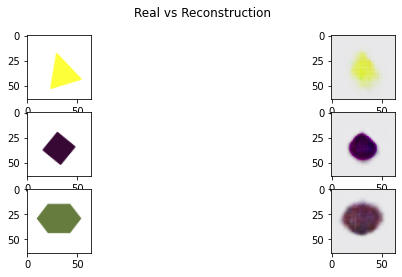

Epoch 9 | train loss 2353.12 | valid loss 2285.71: 100%|█████████████████████████████| 282/282 [00:03<00:00, 91.91it/s]
Epoch 10:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 103.10it/s]

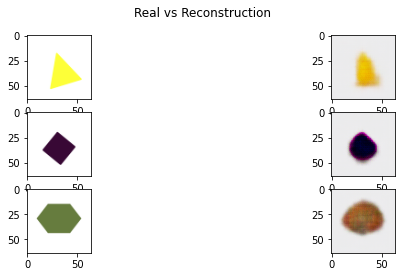

Epoch 10 | train loss 2194.74 | valid loss 2207.87: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.48it/s]
Epoch 11:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.80it/s]

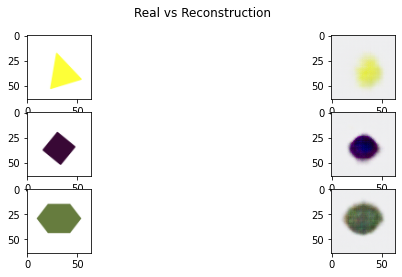

Epoch 11 | train loss 2071.82 | valid loss 2014.29: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.81it/s]
Epoch 12:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.79it/s]

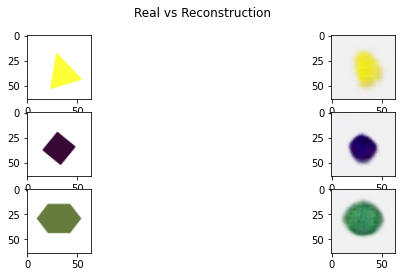

Epoch 12 | train loss 1947.10 | valid loss 1893.97: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.82it/s]
Epoch 13:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.70it/s]

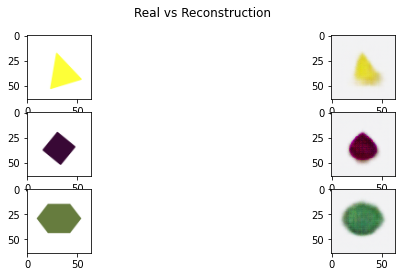

Epoch 13 | train loss 1868.37 | valid loss 1821.01: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.69it/s]
Epoch 14:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.51it/s]

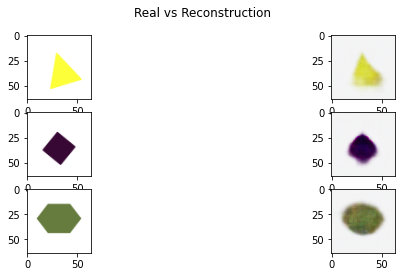

Epoch 14 | train loss 1794.39 | valid loss 1737.42: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.60it/s]
Epoch 15:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.89it/s]

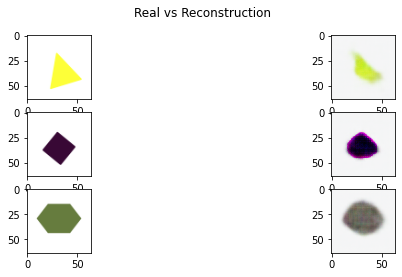

Epoch 15 | train loss 1707.80 | valid loss 2179.41: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.98it/s]
Epoch 16:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.89it/s]

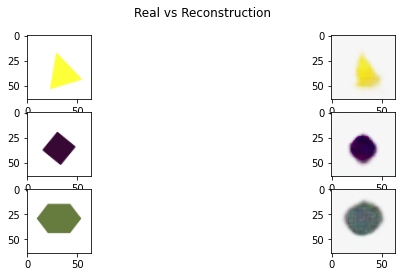

Epoch 16 | train loss 1677.69 | valid loss 1632.36: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.93it/s]
Epoch 17:  97%|██████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 102.16it/s]

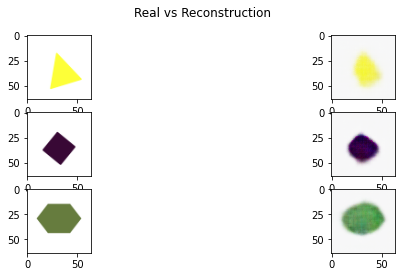

Epoch 17 | train loss 1612.98 | valid loss 1583.77: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.33it/s]
Epoch 18:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.35it/s]

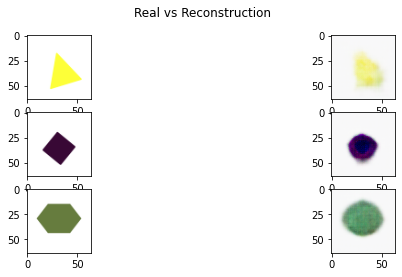

Epoch 18 | train loss 1569.84 | valid loss 1600.43: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.59it/s]
Epoch 19:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.23it/s]

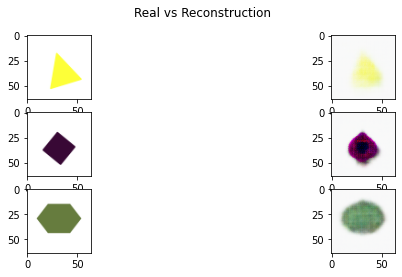

Epoch 19 | train loss 1522.73 | valid loss 1569.76: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.34it/s]
Epoch 20:  96%|██████████████████████████████████████████████████████████████████▌  | 272/282 [00:02<00:00, 100.94it/s]

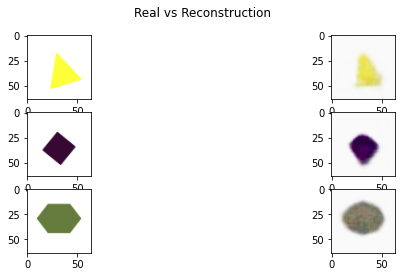

Epoch 20 | train loss 1489.93 | valid loss 1486.44: 100%|████████████████████████████| 282/282 [00:03<00:00, 87.79it/s]
Epoch 21:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.32it/s]

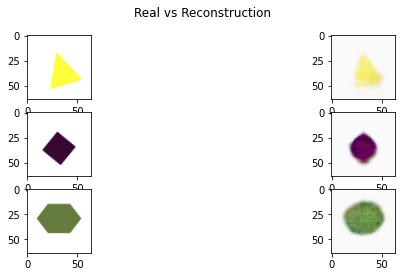

Epoch 21 | train loss 1463.14 | valid loss 1486.54: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.46it/s]
Epoch 22:  97%|██████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 103.13it/s]

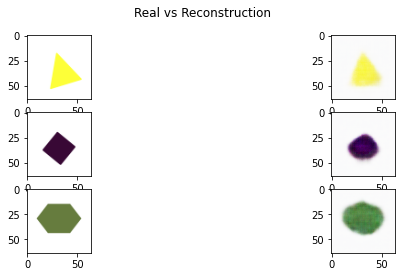

Epoch 22 | train loss 1431.59 | valid loss 1421.44: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.61it/s]
Epoch 23:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.30it/s]

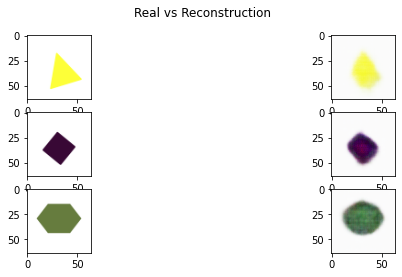

Epoch 23 | train loss 1438.78 | valid loss 1434.01: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.54it/s]
Epoch 24:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.27it/s]

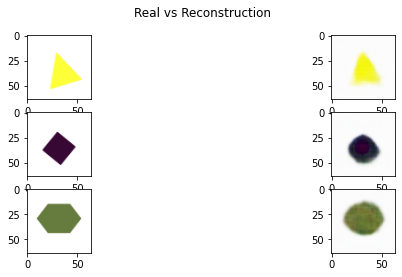

Epoch 24 | train loss 1393.27 | valid loss 1387.55: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.00it/s]
Epoch 25:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.74it/s]

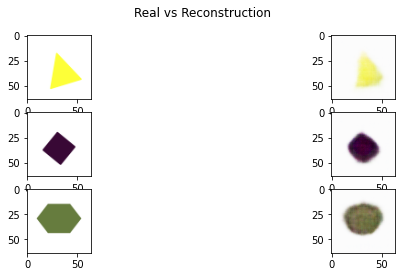

Epoch 25 | train loss 1386.82 | valid loss 1368.08: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.18it/s]
Epoch 26:  97%|██████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 102.01it/s]

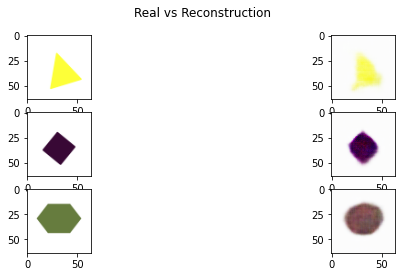

Epoch 26 | train loss 1362.62 | valid loss 1438.64: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.24it/s]
Epoch 27:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.91it/s]

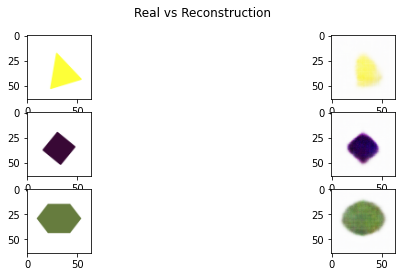

Epoch 27 | train loss 1385.63 | valid loss 1361.92: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.98it/s]
Epoch 28:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.71it/s]

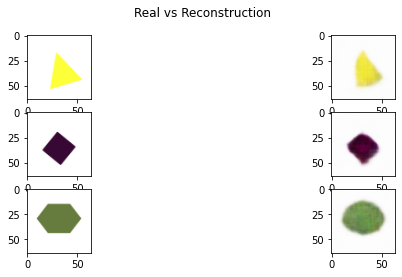

Epoch 28 | train loss 1339.48 | valid loss 1339.48: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.01it/s]
Epoch 29:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.04it/s]

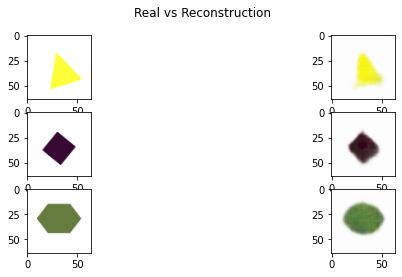

Epoch 29 | train loss 1323.81 | valid loss 1332.27: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.41it/s]
Epoch 30:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.49it/s]

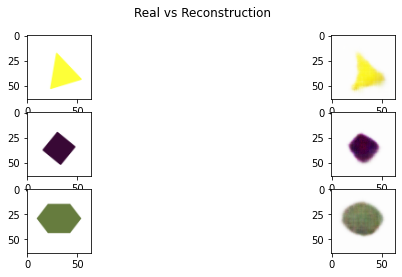

Epoch 30 | train loss 1327.14 | valid loss 1328.18: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.45it/s]
Epoch 31:  97%|██████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 101.31it/s]

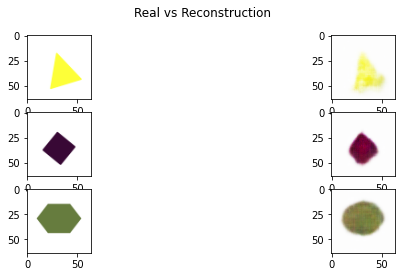

Epoch 31 | train loss 1302.93 | valid loss 1305.55: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.01it/s]
Epoch 32:  97%|███████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 99.87it/s]

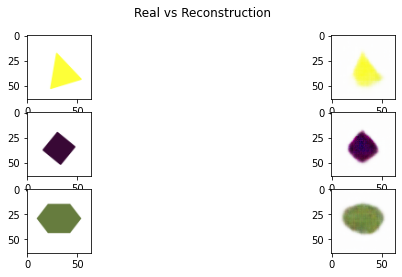

Epoch 32 | train loss 1293.68 | valid loss 1429.17: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.37it/s]
Epoch 33:  96%|██████████████████████████████████████████████████████████████████▌  | 272/282 [00:02<00:00, 102.03it/s]

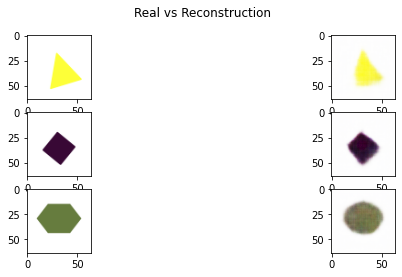

Epoch 33 | train loss 1284.72 | valid loss 1291.84: 100%|████████████████████████████| 282/282 [00:03<00:00, 87.48it/s]
Epoch 34:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.43it/s]

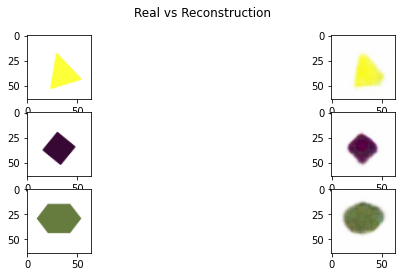

Epoch 34 | train loss 1280.20 | valid loss 1278.31: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.85it/s]
Epoch 35:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.19it/s]

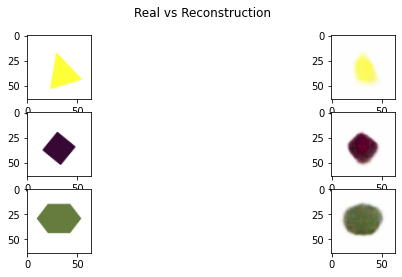

Epoch 35 | train loss 1275.42 | valid loss 1295.98: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.39it/s]
Epoch 36:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 100.37it/s]

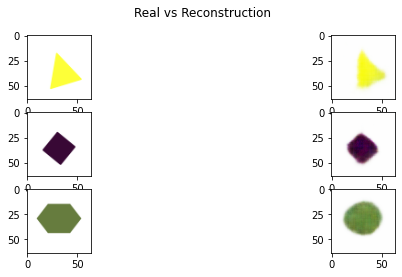

Epoch 36 | train loss 1267.04 | valid loss 1276.09: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.68it/s]
Epoch 37:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.73it/s]

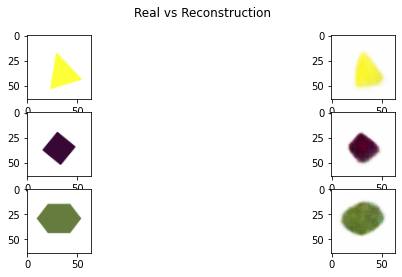

Epoch 37 | train loss 1264.10 | valid loss 1282.93: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.27it/s]
Epoch 38:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.02it/s]

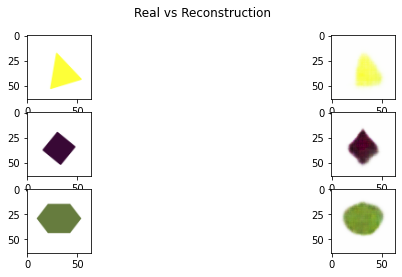

Epoch 38 | train loss 1260.15 | valid loss 1267.01: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.06it/s]
Epoch 39:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 100.71it/s]

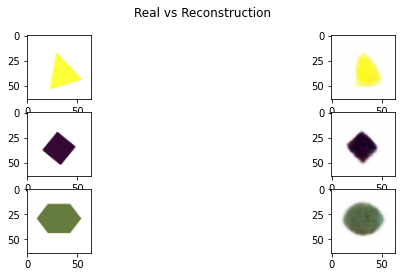

Epoch 39 | train loss 1252.90 | valid loss 1313.47: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.92it/s]
Epoch 40:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.79it/s]

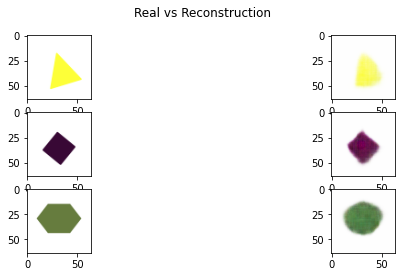

Epoch 40 | train loss 1247.83 | valid loss 1263.37: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.15it/s]
Epoch 41:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.86it/s]

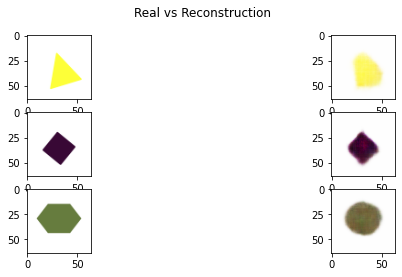

Epoch 41 | train loss 1244.35 | valid loss 1269.33: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.21it/s]
Epoch 42:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.78it/s]

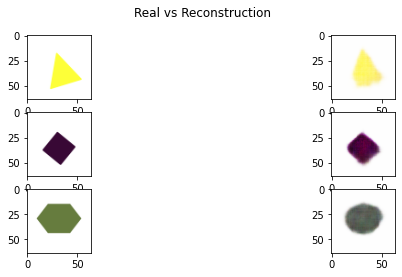

Epoch 42 | train loss 1240.49 | valid loss 1266.77: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.33it/s]
Epoch 43:  97%|██████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 101.92it/s]

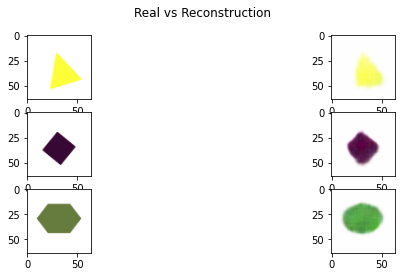

Epoch 43 | train loss 1238.33 | valid loss 1255.90: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.83it/s]
Epoch 44:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.62it/s]

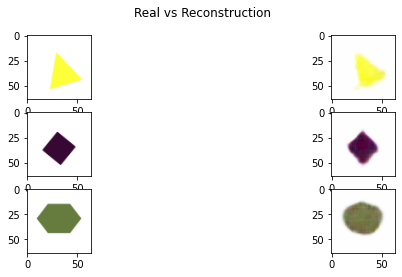

Epoch 44 | train loss 1235.85 | valid loss 1247.45: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.98it/s]
Epoch 45:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.98it/s]

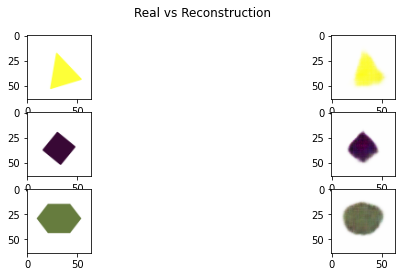

Epoch 45 | train loss 1230.11 | valid loss 1241.89: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.89it/s]
Epoch 46:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 102.03it/s]

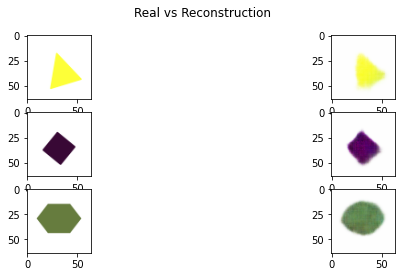

Epoch 46 | train loss 1228.34 | valid loss 1246.59: 100%|████████████████████████████| 282/282 [00:03<00:00, 88.08it/s]
Epoch 47:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.32it/s]

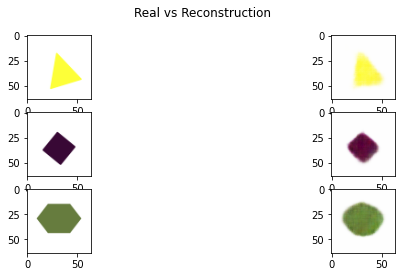

Epoch 47 | train loss 1224.76 | valid loss 1254.59: 100%|████████████████████████████| 282/282 [00:03<00:00, 91.33it/s]
Epoch 48:  97%|███████████████████████████████████████████████████████████████████▊  | 273/282 [00:02<00:00, 97.53it/s]

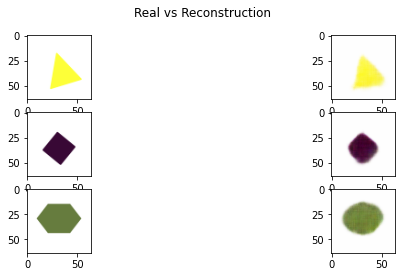

Epoch 48 | train loss 1223.97 | valid loss 1234.79: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.18it/s]
Epoch 49:  96%|██████████████████████████████████████████████████████████████████▎  | 271/282 [00:02<00:00, 101.99it/s]

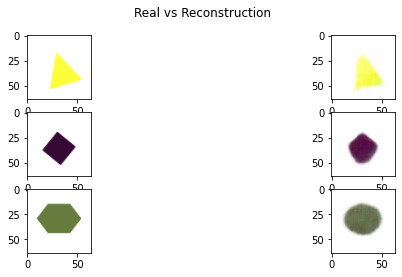

Epoch 49 | train loss 1221.94 | valid loss 1241.47: 100%|████████████████████████████| 282/282 [00:03<00:00, 90.49it/s]
Epoch 50:  97%|███████████████████████████████████████████████████████████████████  | 274/282 [00:02<00:00, 101.77it/s]

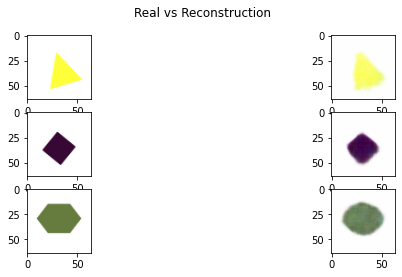

Epoch 50 | train loss 1221.35 | valid loss 1244.89: 100%|████████████████████████████| 282/282 [00:03<00:00, 87.98it/s]


In [10]:
net = BVAE(z_dim)
net = net.to(device)
optimizer = torch.optim.AdamW(net.parameters(), lr=lr)

train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

num_batches = len(train_dataloader)
num_valid_batches = len(valid_dataloader)


train_losses, valid_losses = [], []

update_idxs = set([i * (num_batches // updates_per_epoch)
    for i in range(1, updates_per_epoch)] + [num_batches])

best_valid = 1e9
for epoch in range(1, 1+num_epochs):
    total_loss = 0.0 

    pbar = tqdm(train_dataloader, desc=f"Epoch {epoch}", leave=True, total=num_batches)
    optimizer.zero_grad()
    for idx, x in enumerate(pbar, start=1):
        x = x.to(device)
        
        recon, mu, var, _ = net(x)
        
        loss = vae_loss(x, mu, var, recon, beta)

        total_loss += loss.item() / gradient_accumulation_steps
        loss = loss / gradient_accumulation_steps
        loss.backward()
        
        if (idx % gradient_accumulation_steps == 0) or (idx == num_batches):
            optimizer.step()
            optimizer.zero_grad()

        if idx in update_idxs:
            avg_valid_loss = 0.0
            
            displays = []
            net.eval()
            with torch.no_grad():
                for x in valid_dataloader:
                    x = x.to(device)
                    recon, mu, var, z = net(x)
                    loss = vae_loss(x, mu, var, recon, beta)
                    avg_valid_loss += loss.item() / num_valid_batches
                    if not displays:
                        net.random_z = tuple(z[0].detach().cpu().numpy())
                        displays = [
                            (x[0].permute(1, 2, 0).cpu().numpy(), recon[0].permute(1, 2, 0).cpu().numpy()), 
                            (x[1].permute(1, 2, 0).cpu().numpy(), recon[1].permute(1, 2, 0).cpu().numpy()),
                            (x[2].permute(1, 2, 0).cpu().numpy(), recon[2].permute(1, 2, 0).cpu().numpy())
                        ]
                
                if avg_valid_loss < best_valid:
                    torch.save(net, f'models/{beta}-bvae-{z_dim}dim')
                    best_valid = avg_valid_loss
                    
                valid_losses.append(avg_valid_loss)
                
                if idx == num_batches:
                    fig, axes = plt.subplots(3, 2)
                    fig.suptitle('Real vs Reconstruction')
                    fig.set_size_inches(10, 4)
                    for (ax1, ax2), (im1, im2) in zip(axes, displays):
                        ax1.imshow(im1)
                        ax2.imshow(im2)
                    plt.show()
            net.train()


            pbar.set_description(f"Epoch {epoch} | train loss {total_loss / idx:.2f}" + \
                                f" | valid loss {avg_valid_loss:.2f}")
            train_losses.append(total_loss / idx) 

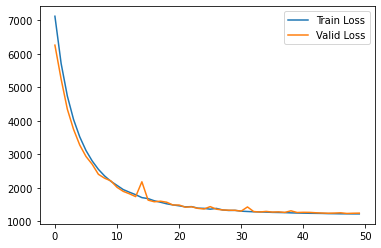

In [11]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.legend()
plt.show()